# The Cloud & Microsoft Azure, Part I

## Front Matter
### October 19th 2020 - Version 1.0.5

### Contact Details
<div class="alert alert-warning">

 - Dr. James Percival
 - Room 4.85 RSM building
 - email: j.percival@imperial.ac.uk
 - Teams: <code>@Percival, James R</code> in <code>#ACSE1</code> or <code>#General</code>, or DM me.
</div>

### Learning Objectives

### By the end of this lecture you should:
 - Understand public and private cloud and why people use them.
 - Understand the different levels of cloud service.
 - Be able to describe virtualization and containers.
 - Know how to create & connect to a VM on Azure.
 - Understand the basics of Docker & why people use it.

## Introducing the Cloud

### What is the cloud?

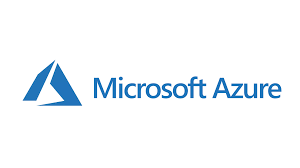

Multiple related definitions, e.g. Wikipedia:

> Cloud computing is the on-demand availability of computer system resources, especially data storage (cloud storage) and computing power, without direct active management by the user. The term is generally used to describe data centers available to many users over the Internet. Large clouds, predominant today, often have functions distributed over multiple locations from central servers. If the connection to the user is relatively close, it may be designated an edge server. 
>
> _from the cloud computing article_

or from Microsoft:

> Simply put, cloud computing is the delivery of computing services – including servers, storage, databases, networking, software, analytics and intelligence – over the Internet (“the cloud”) to offer faster innovation, flexible resources and economies of scale. Typically, you only pay for cloud services you use, helping you lower your operating costs, run your infrastructure more efficiently and scale as your business needs change.

In general, "the Cloud" is a set of networked computer resources accessed remotely over a wide area network such as the internet.

### Public Cloud vs. Private Cloud

#### Public Cloud

For the Public Cloud, _services_ are bought (often Pay As You Go) on a need basis, with infrastructure shared with other users (often on a per machine basis)

- Multiple providers:
    - Microsoft Azure
    - Amazon AWS
    - Google Cloud Services
    - Alibaba Cloud

#### Private Cloud

For a Private Cloud system, the full _infrastructure_ (i.e. computer equipment at the data centre level) is purchased, and then run (or subcontracted) by the company or organization in question, and then accessed over a network (the network itself may be public, so via the internet, or private). This gives full control over hardware, policy and configuration.

An example, the college [HPC clusters](https://www.imperial.ac.uk/admin-services/ict/self-service/research-support/rcs/support/getting-started/) (aka CX1 &CX2) provide multi-machine compute systems to Imperial researchers, based out of a data centre in Slough, to the west of London.

#### Hybrid Cloud

In a hybrid cloud situation an organization run a private cloud on their own data centre, but purchases additional public cloud services as needed. In principle, this allows the organization to combine the control and intellectual property advantages of private cloud with the availability and scalability advantages of the public cloud. In practice this can sometimes lead to duplication of effort, or attempts to replicate unsuitable policies from the private cloud service into the public cloud part.

#### Why use the cloud?

- Availability - systems tend to be online and supported 24/7 
- Scalability - Increasing/decreasing your allocation tends to happen instantly (or as soon as your credit card bill allows)
- Reach - Systems are accessible from most of the world via internet
- Agility - rapidly develop, test & deploy software
- Disaster Mitigation - Usually offer backups/rollbacks, sometimes at extra cost. Note that this doesn't prevent users needing to check that what's backed up is what was intended.
- Fault Tolerance - Cloud systems usually fallback to alternatives in case of physical failures.
- Elasticity - Systems can react dynamically to increasing or decreasing demand.

#### Why not to use the cloud?

- Latancy issues - Keep large bandwidth data transfers local to each other.
- Costs (Data transfer, machine hire, etc.)
- Security - You are handing your data to someone else.
- Control - If you need personal oversight.
- Intellectual property concerns - some data may have legal or contractual constraints.

## Infrastructure, Platform and Software as a Service

"As a service" can be treated the same as "available to rent". Just as the difference between renting a hire car versus hailing a taxi, the different levels of service imply different levels of responsibility and control. We can list the three most typical types here. Note that precisely where in this hierarchy a specific service can be difficult, particularly when services are parcelled up and resold.

### Infrastructure As A Service (IaaS)

Infrastructure As A Service is the most basic model for using the Cloud. You purchase time on an entire computer (usually actually a virtual machine, i.e. a portion of a large server), then set up the entire system from scratch, just as you would with a computer under your desk.

IASS gives you maximum control of your environment (you can do virtually anything you like within the constraints of your cloud provider's security policies). However this also means you have considerable responsibilities (applying updates, scaling machine sizes, etc), and may be paying more than you would for other models, particularly if you have severely overestimated your system requirements *or leave machines running but unused*.

### Platform As A Service (PaaS)

Platform as a service further abstracts away the concepts of hardware and environment so that you can concentrate on writing the code which actually does the job that you want to do. The provider configures the core operating system and programming environment, with you just writing the actual application code. An example would be a service such as www.mybinder.org or Google Colab, which provides Jupyter instances to work in.

### Software As A Service (SaaS)

Software As A Service is the cloud model with the lowest barrier to entry. The provider supplies both the infrastructure and the application software, allowing you to concentrate purely on your data.

### The Pizza model 

We can illustrate the differences by considering an alternative industry, that of pizza:

#### Pizza as a service

Who is in charge of providing the following:

||Local on premises (homemade)|IaaS (store bought)|PaaS (takeaway)|SaaS (restaurant)|
|-|:---:|:--:|:--:|:--:|
|Plates|You|You|You|Them|
|Glasses|You|You|You|Them|
|Oven|You|You|Them|Them|
|Power|You|You|Them|Them|
|Dough|You|Them|Them|Them|
|Cheese|You|Them|Them|Them|
|Toppings|You|Them|Them|Them|

The example is not mine. The same table for cloud computing looks somewhat like:

||Local on premises |IaaS |PaaS |SaaS |
|-|:---:|:--:|:--:|:--:|
|Applications|You|You|You|Them|
|Backend data|You|You|You|Them|
|Runtime libraries|You|Them|Them|Them|
|Operating system|You|You|Them|Them|
|Computers|You|Them|Them|Them|
|Network|You|Them|Them|Them|

## Accessing Azure Cloud Services

### Getting an Azure account

Microsoft Azure provides a number of different kinds of accounts and subscription methods:

- Free accounts 
- Promotional subscriptions
- Pay-As-You-Go subscriptions
- Enterprise subscriptions

Most relevant for this course is the Azure Student subscription, which allows users from authorized educational institutions (such as Imperial College) to register each year for $100 of free credit and (slightly limited) access to all Azure services. Activation is via your college email address, to which your account will be linked.

The [Azure Portal](https://portal.azure.com) is the (desktop) point of interaction with Azure services on the web.

#### Logging into the Portal

You automatically have access to the Azure portal via your college login id (in the form `abc120@ic.ac.uk`) and password. In fact, Imperial College delegate their system authentication to Azure Active Directory, a Microsoft Azure Cloud service for authentication and authorization.

Once logged in you can sign up for your student subscription on this [page](https://portal.azure.com/#blade/Microsoft_Azure_Education/EducationMenuBlade/overview). This will give you 100 US dollars  of virtual money to spend on Microsoft Cloud services. Note that 100 dollar can last a very long time if used carefully, but can rapidly run out if you are wasteful. Always be sure to shut down machines that you are no longer using, and to clean up after yourself.

## Virtualization & Containerization

### Compatibility layers/Emulation

Before considering full virtualization, there are compatibility layers (such as the Windows Subsystem for Linux version 1, WSL1, which allows linux problems to run on windows, or WINE, which does the reversee). Very similar are the various translation layers released for Mac OS X during hardware transitions, from powerPC to Intel chips and from 32 to 64 bit software. It is likely that similar software exists as Apple transition from Intel to ARM/Nvidea chips in ther latest range.

 These software layers act at the level of application, which allows software created for one operating system to run on another operating system by translating commands intended for one interface into commands intended for another. Very similar is emulation, in which software is created to play the part of hardware not physically present in the machine.

### Virtual Machines

Servers in data centres are often designed to maximize the number of processor cores available on every motherboard, with multiple CPU sockets and high core counts on the individual dies. However the number of cores users actually need varies, often as low as 1 core for simple, low priority serial tasks. Virtualization allows Cloud providers to portion out the cores of a particular server board between multiple users, with each of them experiencing behaviour as if they had access to an entire machine.

Conceptually, virtualization is fairly simple: Computer software has developed in layers, which communicate with each other via standard interfaces. This allows equipment from multiple manufacturers to work together. In a physical computer the hardware & firmware (e.g. the BIOS) sit below the operating system. In a virtual machine a second operating system sits above a software layer running on the host operating which provides an interrface to some of the underlying hardware, typically only a subset of the real hardware available to it. 

### A Concrete example: Buying time on a Virtual Machine

<div class="alert alert-info">

This section is based on the [worked example](https://microsoftlearning.github.io/AZ-900T0x-MicrosoftAzureFundamentals/Instructions/Walkthroughs/01-Create%20a%20virtual%20machine.html) presented on the Azure GitHub pages for AZ900 Microsoft Azure Fundamentals certification.

We will:
1. Sign into the [Azure portal](https://portal.azure.com)
2. From the **All services** blade search for and select **Virtual machines** and then click **+ Add** and chose **+ Virtual machine**
3. On the **Basics** tab change the following from the default values:
    - Change *Subscription* to *Azure for Students*.
    - Select *create new*  for **Resource group** and give a name you'll remember.
    - Set **Virtual machine name** as *myVm.
    - Choose **Image** as *Ubuntu Server 18.04 LTS - Gen1*.
    - Open **Inbound port** for *HTTP(80)* as well as *SSH(22).
    - Select password authentication and pick a username & password.
4. Now click create.

Any unacceptable values or warnings are highlighted. Note that some security settings are not recommended for long term unattended systems (e.g. password based SSH).

When the machine is fully created, click the pop-up "Go to resource" button and note down the ip address you have been issued. You may now connect to the remote Ubuntu linux server using a command like

```
ssh mycoolusername@123.456.78.123
```

You may have to type `y` to accept a new hash key before connecting.

Now that you are connected, lets do something easy and open up a simple text editor by entering
`nano`. Type a simple message and save it to disk using the command `ctrl+o`. Finally exit using `ctrl+x`. If you forget key commands, the bar at the bottom will remind you, as long as you remember that `^` means `ctrl+`.

Since we opened the HTTP port, we can serve this file to the world using a python command

```
sudo python3 -m http.server 80
```

If you type the ip address you were given into your browser address bar, you will now see your message. Note that we had to use `python3` since on this machine `python` would get you python2.7. Type `ctrl+c` when you wish to stop serving the web page and get back to work.

We can install system packages by combining the `sudo` and `apt` commands. For example

```
sudo apt update
sudo apt install python3-pip
```

will install a python3 version of pip as `pip3`. You will note that some other system packages need updating. With IaaS such as virtual machines, this is your job.

When pip3 is installed, then running 

```
export PATH=./local/bin:$PATH
sudo apt install npm
sudo npm install -g configurable-http-proxy
sudo python3 -m pip install jupyter-core
sudo python3 -m pip install jupyterhub
```

will install a version of jupyter. Running it with

`sudo python3 -m jupyterhub --port 80`

will present a login page at the ip address, to which you can authenticate with the login and password you used to connect to the machine.

When you are finished with the machine, go back to the portal, access the resource group you created and delete it to avoid running up any more cost.

The Azure version of this walkthrough shows how to connect to a Windows image using RDP. Feel free to try that as well. **Remember to clean up by deleting your resource groups at the end of the session!**

</div>

#### SSH, the secure shell

[SSH](https://v4.software-carpentry.org/shell/ssh.html), the secure shell provides a cryptographically secured shell (i.e. prompt or terminal) connection from one computer to another. It supports login via username & password, or via the exchange of cryptographic keys. Implementations, both of the server and the client, are available on Windows, linux and Mac OS X.

Using a command in the form `ssh <user>@<server name>`, e.g. `ssh jrper@sshgw.ic.ac.uk` one can open a connection to a remote machine using a default port number

### Containers

Containers represent a lightweight form of virtualization, where a system runs one operating system kernel, but potentially with many userspaces and filesystems (run from file images on the host system) on top of them. By virtualizing at such a high level tens or hundreds of containers can run simultaneously on the same machine.

#### Docker

The most famous and widely used container system is [Docker](https://docker.com). The most used version of this tool uses the Linux kernel to produce a (somewhat) sandboxed userspace connected to its own filesystem. In Docker terminology, scripts called Dockerfiles are used to configure bundles called "images" containing a frozen system which can be copied and unfrozen as a container, including a default executable to run. A simple example Dockerfile might look like the following:

_Dockerfile_

```
# set base image to build on
FROM python:3.8

# set/create current working directory inside container
WORKDIR /example

# copy a file from the host to the container
COPY requirements.txt .

# run a shell command
RUN pip install -r requirements.txt

# default command to run when container starts
CMD python 
```

As with Bash shell commands `#` is used to start a comment in Docker and is not interpreted when building an image. The genuine commands start with an instruction to Docker (written in capital letters  here), followed by arguments to that instruction. The full list of possible commands is available [here](https://docs.docker.com/engine/reference/builder/), along with a smaller cheat sheet [here](https://www.docker.com/sites/default/files/d8/2019-09/docker-cheat-sheet.pdf).

When a machine with Docker running is told to build the Dockerfile into an image using a command of the format

```
docker build [OPTIONS] PATH
```

inside the directory containing the Dockerfile and `requirements.txt` file. For example:

```
docker build --tag example .
```
Docker then processes the file line by line into an image, storing each stage as an intermediate checkpoint. When the image is complete it can be run as a container using a command of the form

```
docker run [OPTIONS] IMAGE [COMMAND]
```

So to run our Python example interactively connected through the terminal we run

```
docker run -it example
```

This will give you access to the python interpreter _inside_ the container, with only system libraries and the packages from the `requirements.txt` available.

Docker images can be uploaded and downloaded to a site called [dockerhub](https://hub.docker.com/), which acts as a repository for them in the same way GitHub does for code.

##### Why use Docker?

Almost everything we've shown here could be done inside inside a `venv` virtual environment, instead of via Docker. The biggest difference is that Docker controls the entire software stack, including linux distribution, package versions and the command to be run (which isn't limited to Python). Moreover Docker images can be uploaded to repositories such as Dockerhub. This makes docker ideal for distributing reproducible "app" style versions of software which are (virtually) guaranteed to work, regardless of the end users' environment. This also makes it ideal for distributions of software to cloud services. The Dockerfile can be transferred and built on the remote system, with confidence the final output will be what was intended.

### Example2 : Running a container on Azure

<div class="alert alert-info">

This section is based on the [worked example](https://microsoftlearning.github.io/AZ-900T0x-MicrosoftAzureFundamentals/Instructions/Walkthroughs/02-Deploy%20Azure%20Container%20Instances.html) presented on the Azure GitHub pages.

1. Sign into the [Azure portal](https://portal.azure.com)
2. From the **All services** blade search for and select **Container Instances** and then click **+ Add**.
93. Select the following options
   - Your *Azure for students* subscription
   - *Create new* resource group (and call it something memorable)
   - **Image source from Docker hub**
   - **Image** to *jrper/myserver:final*

Leave the other options on their defaults and click create. When the instance becomes live, note the web address and navigate your browser to it.

The raw code for the docker image is available from [here](https://github.com/jrper/myserver). Download it and experiment with building , running (through docker) and modifying it, then update your instance to use your own code.

When running locally, you will need to point your browser at `http:://localhost/some/path` while the container is running to see the results.

When you are finished, **remember to delete your resource groups so they do not end up costing you money!**

</div>

## Summary

You should now:

- Understand public and private cloud and why people use them.
- Understand the different levels of cloud services, and the differences between them.
- Be able to describe the basics of virtualization and containers.
- Know how to create & connect to a VM on Azure.
- Understand the basics of Docker & why people use it, as well as how to use it yourself.

## Further Reading

- The [Azure documentation pages](https://docs.microsoft.com/en-us/azure/?product=featured), particularly:
  - The [pages for Python Developers](https://docs.microsoft.com/en-us/azure/developer/python/)
  - The [pages for Virtual Machines](https://docs.microsoft.com/en-us/azure/virtual-machines/windows/)
  - The [pages for container instances](https://docs.microsoft.com/en-us/azure/container-instances/container-instances-quickstart)
- The other Azure Fundamentals [walkthroughs](https://microsoftlearning.github.io/AZ-900T0x-MicrosoftAzureFundamentals/).
- Docker's [documentation](https://docs.docker.com/) pages.
- The Docker [tutorials](https://www.docker.com/101-tutorial).